In [1]:
import wfdb
import matplotlib.pyplot as plt
import scipy.signal
import numpy as np

In [2]:
sampfrom = 1300
samp, rinfo = wfdb.rdsamp("data/drive12", channels=[0], sampfrom=sampfrom, sampto=sampfrom+100)
samp = samp.flatten()

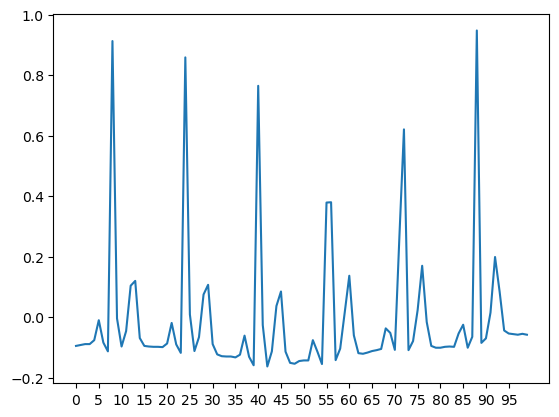

In [3]:
plt.plot(samp)
plt.xticks(np.arange(samp.size, step=5))
plt.show()

In [4]:
def detect_peaks(X, N=5, area=3, rthreshold=50, pthreshold=90, do_plot=False):
    # N = 5 # N per seg
    
    # STFT
    WS = (N//2)+1 # Window samples
    f, t, Zxx = scipy.signal.stft(X, nperseg=N, noverlap=0)
    Zxx = np.abs(Zxx).reshape(-1, WS)
    
    # Detect RoIs
    wmax = np.max(Zxx, axis=1)
    thresholdF = np.percentile(wmax, rthreshold) #Nth percentile
    intervals = t[wmax > thresholdF]
    
    # Detect peaks
    thresholdP = np.percentile(X, pthreshold)*2
    peaks = []
    #area = 3 # additional search area aroud region
    for base in intervals.astype(int):
        if base >= X.size:
            continue
        if base > WS+area:
            base = base-WS-area
        end = base + N + area*2
        window = X[base:end]
        imax = np.max(window)
        if imax > thresholdP:
            peakT = base + np.argmax(window)
            peaks.append(peakT)
    
    # Plot RoIs and peaks
    if do_plot:
        xmin = np.min(X)
        xmax = np.max(X)      
        plt.plot(X, linewidth=5, label="ECG")
        plt.vlines(intervals-WS-area, ymin=xmin, ymax=xmax, color="g", linewidth=0.5, label="roi start")
        plt.vlines(intervals+N+area*2, ymin=xmin, ymax=xmax, color="b", linewidth=0.5, label="roi end")
        plt.vlines(peaks, ymin=xmin, ymax=xmax, color="r", label="peak")
        plt.legend()
    
    return peaks

In [5]:
X = samp

[8, 24, 40, 40, 56, 72, 88]

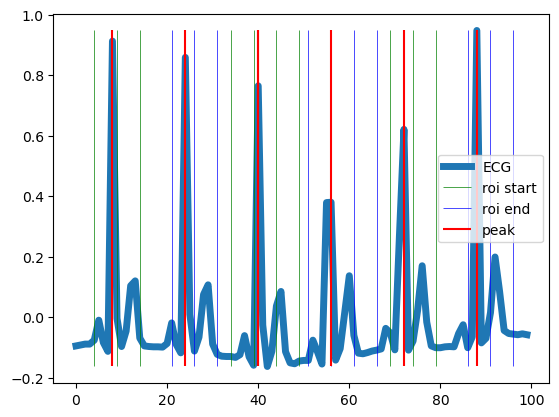

In [6]:
detect_peaks(X, do_plot=True)